# Data Understanding


In [1]:
import pandas as pd
import numpy as np
import  seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, precision_score , recall_score, classification_report

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_PA = pd.read_csv("C:/Users/Lenovo/Downloads/geolifeclef-2025/GLC25_PA_metadata_train.csv")

In [3]:
df_PA.head()

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
0,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,6874.0,212
1,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,476.0,212
2,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,11157.0,212
3,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,8784.0,212
4,3.099038,43.134956,2021,5.0,100.0,MEDITERRANEAN,France,4530.0,212


In [4]:
df_PA.tail() 

,lon,lat,year,geoUncertaintyInM,areaInM2,region,country,speciesId,surveyId
1483632,9.91398,56.82758,2018,10.0,707.0,CONTINENTAL,Denmark,53.0,3919655
1483633,9.91398,56.82758,2018,10.0,707.0,CONTINENTAL,Denmark,5071.0,3919655
1483634,9.91398,56.82758,2018,10.0,707.0,CONTINENTAL,Denmark,1889.0,3919655
1483635,9.91398,56.82758,2018,10.0,707.0,CONTINENTAL,Denmark,10600.0,3919655
1483636,9.91398,56.82758,2018,10.0,707.0,CONTINENTAL,Denmark,963.0,3919655


In [5]:
df_PA.describe() 

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,lon,lat,year,geoUncertaintyInM,areaInM2,speciesId,surveyId
count,1.483637e+06,1.483637e+06,1.483637e+06,1.471141e+06,1300365.0,1.483637e+06,1.483637e+06
mean,9.024850e+00,5.242552e+01,2.018179e+03,7.483046e+00,-inf,5.811442e+03,1.969927e+06
std,4.437247e+00,4.853112e+00,1.094525e+00,6.190821e+00,NaN,3.392812e+03,1.135967e+06
min,-9.018346e+00,3.511705e+01,2.017000e+03,0.000000e+00,-inf,2.000000e+00,2.120000e+02
25%,6.052593e+00,4.856769e+01,2.017000e+03,3.000000e+00,25.0,2.847000e+03,9.768390e+05
50%,9.380850e+00,5.515287e+01,2.018000e+03,1.000000e+01,79.0,6.079000e+03,1.976273e+06
75%,1.041882e+01,5.626047e+01,2.019000e+03,1.000000e+01,79.0,8.818000e+03,2.960059e+06
max,2.915421e+01,5.989300e+01,2.021000e+03,1.000000e+02,8000.0,1.125400e+04,3.919655e+06


In [6]:
df_PA.shape 

(1483637, 9)

In [7]:
df_PA.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483637 entries, 0 to 1483636
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   lon                1483637 non-null  float64
 1   lat                1483637 non-null  float64
 2   year               1483637 non-null  int64  
 3   geoUncertaintyInM  1471141 non-null  float64
 4   areaInM2           1300365 non-null  float64
 5   region             1483637 non-null  object 
 6   country            1483637 non-null  object 
 7   speciesId          1483637 non-null  float64
 8   surveyId           1483637 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 101.9+ MB


In [8]:
print(df_PA.isnull().sum())

print(df_PA.duplicated().sum())

# Mengecek nilai unik di setiap kolom
for col in df_PA.columns:
    print(f"{col}: {df_PA[col].nunique()} nilai unik")


lon                       0
lat                       0
year                      0
geoUncertaintyInM     12496
areaInM2             183272
region                    0
country                   0
speciesId                 0
surveyId                  0
dtype: int64
20378
lon: 84157 nilai unik
lat: 82932 nilai unik
year: 5 nilai unik
geoUncertaintyInM: 29 nilai unik
areaInM2: 345 nilai unik
region: 8 nilai unik
country: 29 nilai unik
speciesId: 5016 nilai unik
surveyId: 88987 nilai unik


In [9]:
print("Informasi Dataset")
print(df_PA.info())
print("nStatistika Deskriptif")
print(df_PA.describe())

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483637 entries, 0 to 1483636
Data columns (total 9 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   lon                1483637 non-null  float64
 1   lat                1483637 non-null  float64
 2   year               1483637 non-null  int64  
 3   geoUncertaintyInM  1471141 non-null  float64
 4   areaInM2           1300365 non-null  float64
 5   region             1483637 non-null  object 
 6   country            1483637 non-null  object 
 7   speciesId          1483637 non-null  float64
 8   surveyId           1483637 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 101.9+ MB
None
nStatistika Deskriptif
                lon           lat          year  geoUncertaintyInM   areaInM2  \
count  1.483637e+06  1.483637e+06  1.483637e+06       1.471141e+06  1300365.0   
mean   9.024850e+00  5.242552e+01  2.018179e+03       7.483046e+00

C:\Users\Lenovo\anaconda3\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

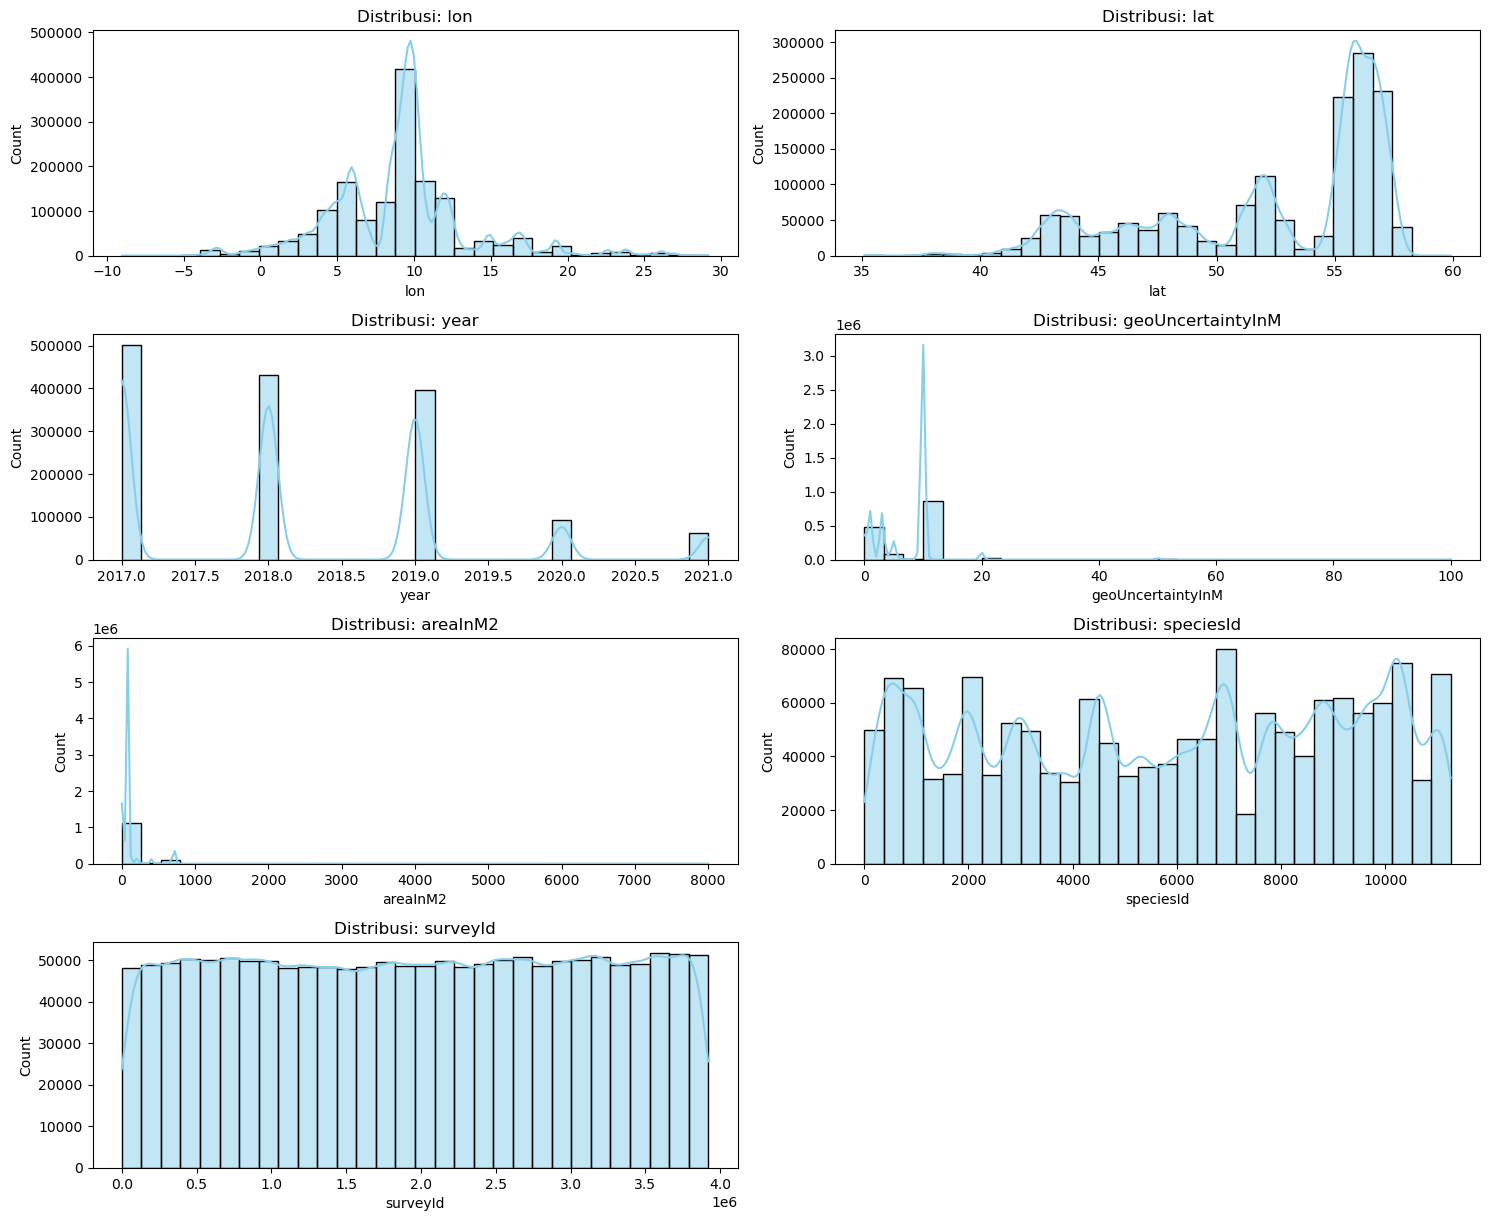

In [10]:
numeric_cols = df_PA.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, len(numeric_cols)*3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.histplot(df_PA[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()


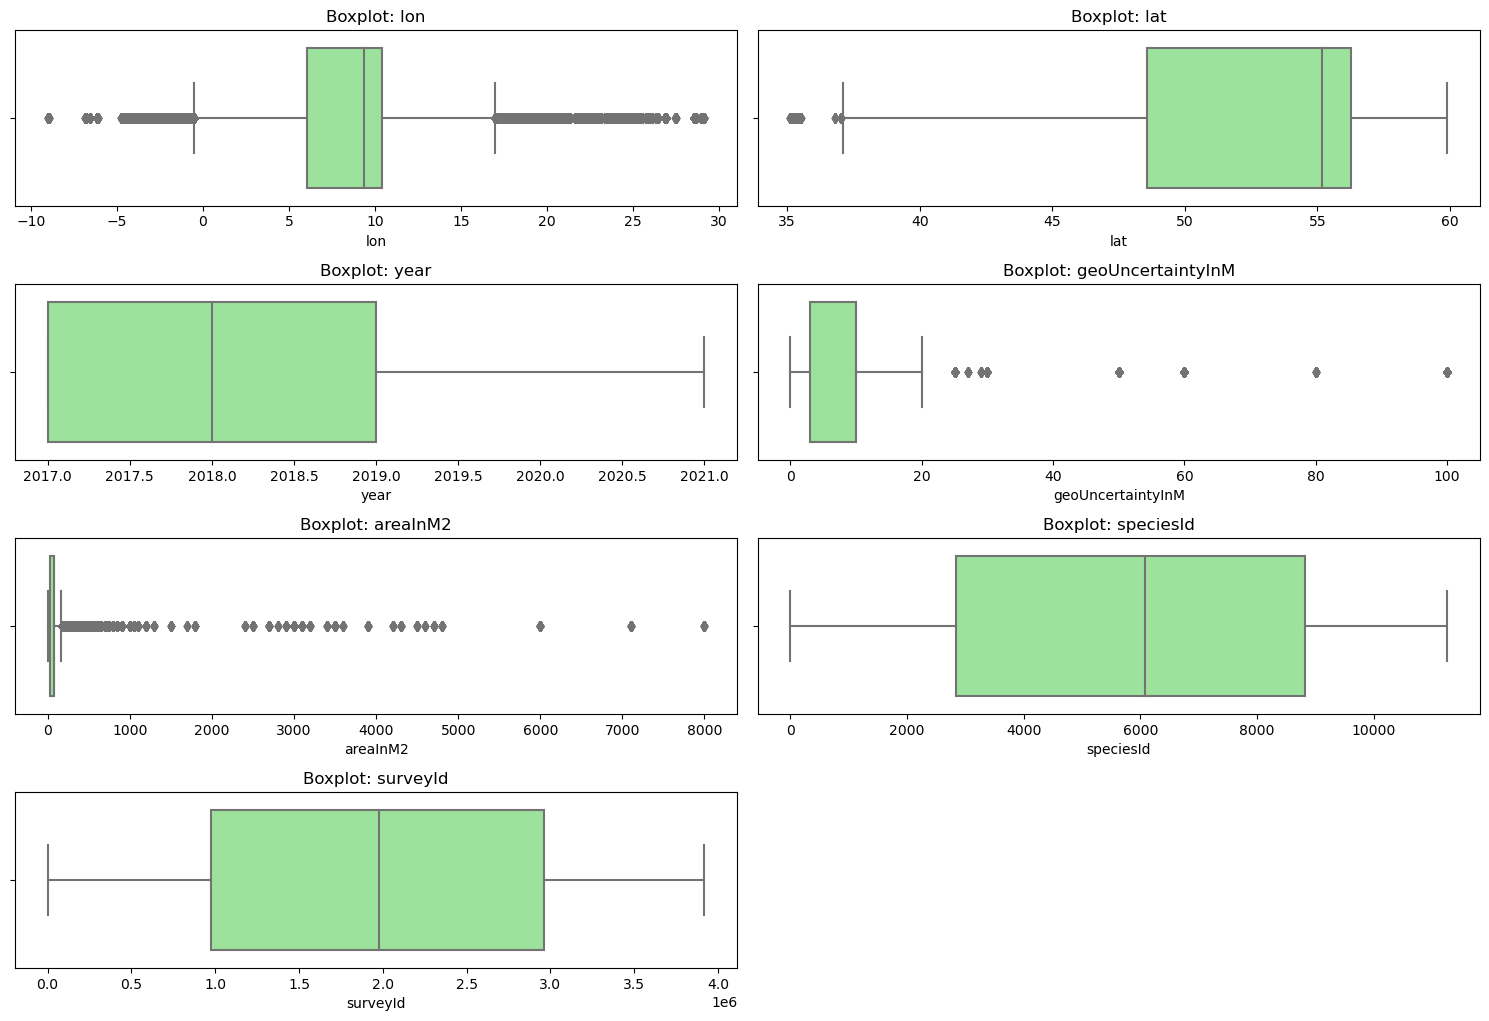

In [11]:
plt.figure(figsize=(15, len(numeric_cols)*2.5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols), 2, i)
    sns.boxplot(data=df_PA, x=col, color='lightgreen')
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()


In [12]:
numeric_cols = df_PA.select_dtypes(include=np.number)

corr_matrix = numeric_cols.corr()

print("Matriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
                        lon       lat      year  geoUncertaintyInM  areaInM2  \
lon                1.000000  0.193349  0.024198           0.343205  0.038123   
lat                0.193349  1.000000 -0.185559           0.338754  0.105872   
year               0.024198 -0.185559  1.000000          -0.054645 -0.075570   
geoUncertaintyInM  0.343205  0.338754 -0.054645           1.000000  0.040744   
areaInM2           0.038123  0.105872 -0.075570           0.040744  1.000000   
speciesId          0.003009  0.014907  0.003626           0.001994 -0.017997   
surveyId           0.006114 -0.000452 -0.006669          -0.000538  0.003576   

                   speciesId  surveyId  
lon                 0.003009  0.006114  
lat                 0.014907 -0.000452  
year                0.003626 -0.006669  
geoUncertaintyInM   0.001994 -0.000538  
areaInM2           -0.017997  0.003576  
speciesId           1.000000  0.000730  
surveyId            0.000730  1.000000  


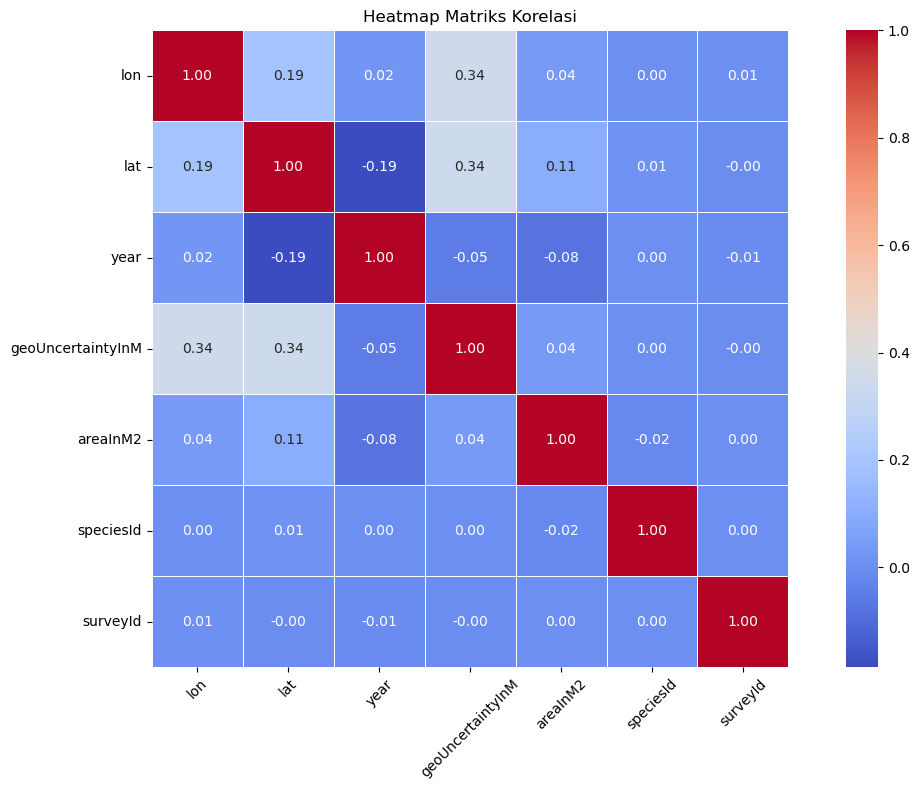

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=0.5)
plt.title('Heatmap Matriks Korelasi')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Data Preparation

# Handling Missing Data by Median

In [14]:
df_PA.fillna({
    'geoUncertaintyInM': df_PA['geoUncertaintyInM'].median(),
    'areaInM2': df_PA['areaInM2'].median()
}, inplace=True)

In [15]:
print(df_PA.isnull().sum())

lon                  0
lat                  0
year                 0
geoUncertaintyInM    0
areaInM2             0
region               0
country              0
speciesId            0
surveyId             0
dtype: int64


In [16]:
print(f"Jumlah data duplikat: {df_PA.duplicated().sum()}")


Jumlah data duplikat: 20378


In [17]:
df_PA = df_PA.drop_duplicates()

In [18]:
print(f"Jumlah data duplikat: {df_PA.duplicated().sum()}")

Jumlah data duplikat: 0


In [19]:
print(df_PA.dtypes)

lon                  float64
lat                  float64
year                   int64
geoUncertaintyInM    float64
areaInM2             float64
region                object
country               object
speciesId            float64
surveyId               int64
dtype: object


In [20]:
df_PA['location_point'] = list(zip(df_PA['lon'], df_PA['lat']))
df_PA[['lon', 'lat', 'location_point']].head()

,lon,lat,location_point
0,3.099038,43.134956,"(3.099038, 43.134956)"
1,3.099038,43.134956,"(3.099038, 43.134956)"
2,3.099038,43.134956,"(3.099038, 43.134956)"
3,3.099038,43.134956,"(3.099038, 43.134956)"
4,3.099038,43.134956,"(3.099038, 43.134956)"


In [21]:
df_PA['label'] = df_PA['speciesId']
print(df_PA['label'].nunique())  # Cek berapa kelas spesies
print(df_PA['label'].value_counts().head())  # Cek distribusi spesies terbanyak


5016
label
540.0      21298
4397.0     19513
254.0      18044
4499.0     15117
10317.0    14514
Name: count, dtype: int64
